# Visualizing Intermediate Layers Activations

In [1]:
%tensorflow_version 1.x
from keras.datasets import cifar10, mnist, cifar100, fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
epochs = 5
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

number_of_classes = y_train.max() - y_train.min() + 1
model = Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________

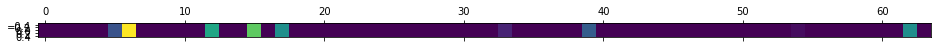

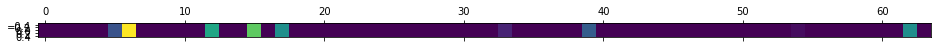

In [3]:
def get_activation(model, layer, filter, image):
    layer_outputs = [layer.output for layer in model.layers[:]] 
    activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(image)
    activations = activations[layer]
    if activations.ndim == 4:
        fig, axs = plt.subplots(1,2)
        axs[0].matshow(activations[0, :, :, filter], cmap='viridis')
        axs[1].matshow(image[0, :, :, 0], cmap='viridis')
    else:
        plt.matshow(activations[:], cmap='viridis')

for i in range(2):
    get_activation(model, 5, i, x_test[1].reshape((1, 28, 28, 1)))

# Faster way of visualization?

[keract]('https://github.com/philipperemy/keract') is a library that simplifies this process...

odict_keys(['dense/Relu:0'])
dense/Relu:0 (1, 64) 


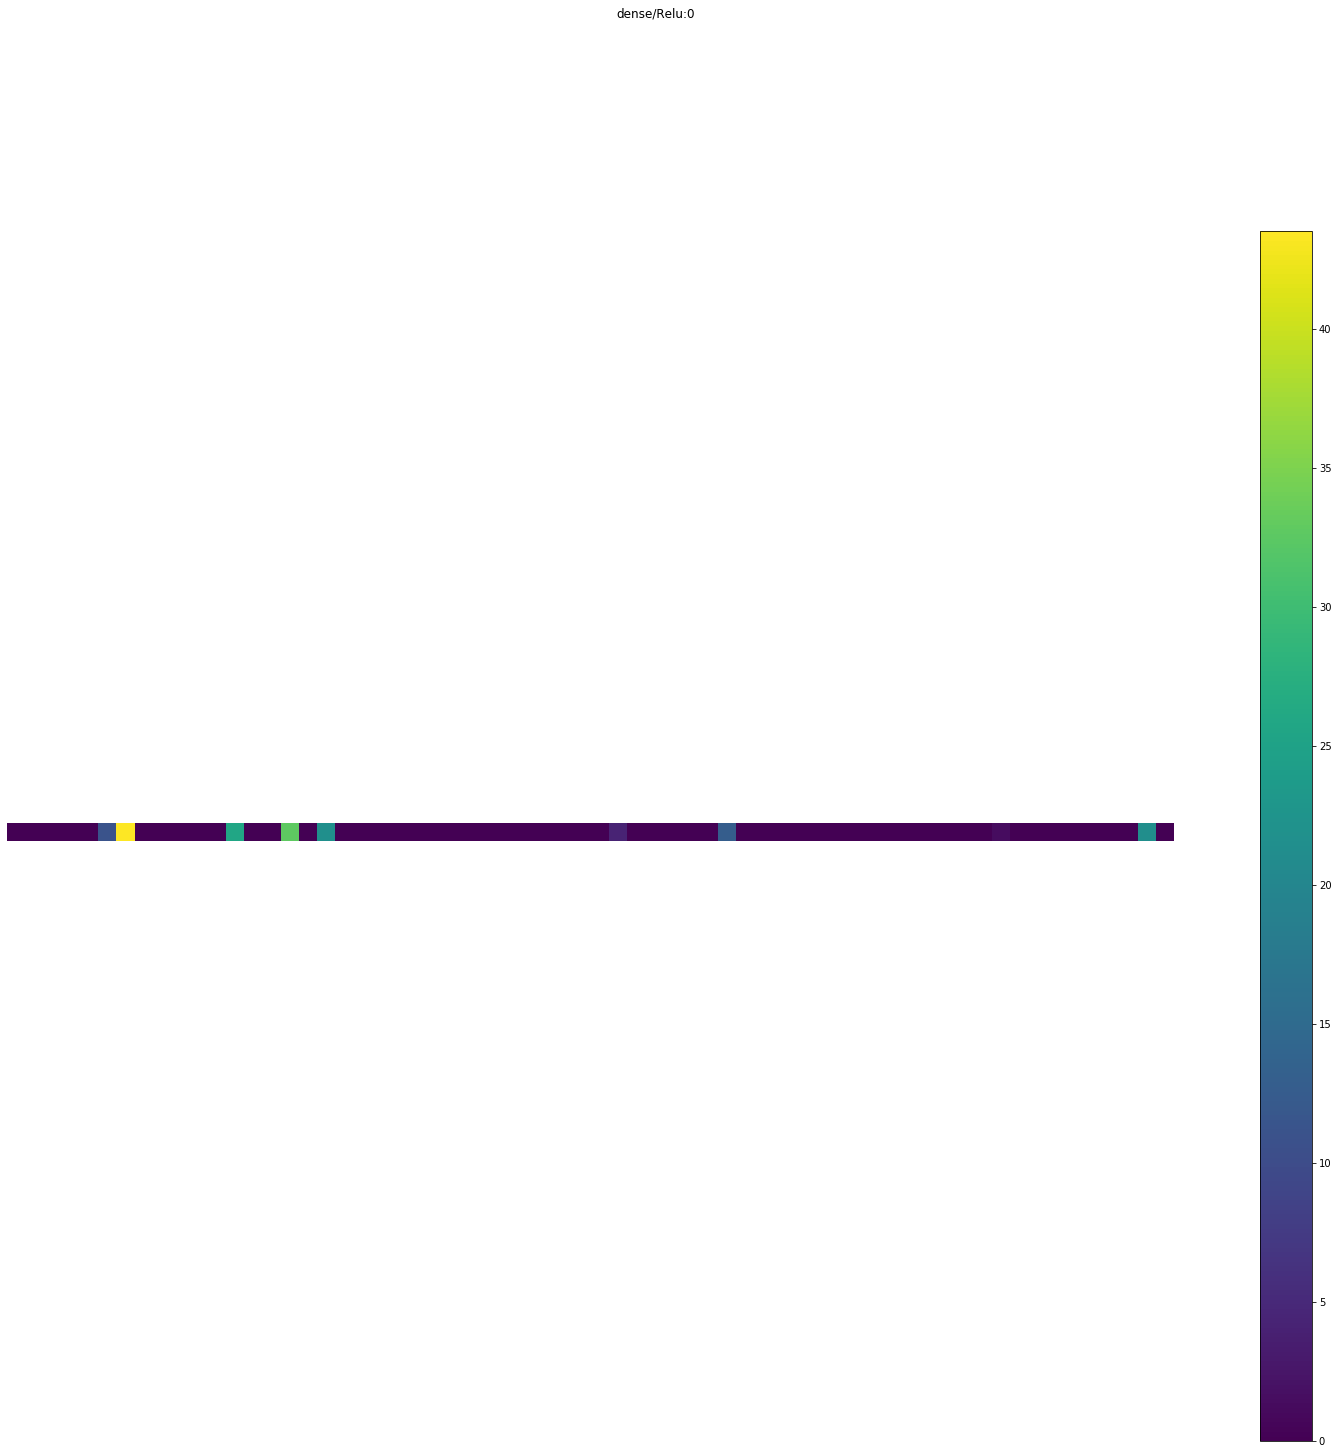

In [16]:
from keract import get_activations, display_activations, get_gradients_of_trainable_weights
activations = get_activations(model, x_test[1].reshape((1, 28, 28, 1)), layer_name='dense')
print(activations.keys())
display_activations(activations, cmap="viridis", save=False)